In [16]:
import time
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [11]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [36]:
print(__doc__)

Automatically created module for IPython interactive environment


1.turn down for faster convergence

In [6]:
t0=time.time()
train_samples=5000

2.load data from https://www.openml.org/d/554

In [12]:
x,y=fetch_openml('mnist_784',version=1,return_X_y=True)

In [13]:
random_state=check_random_state(0)
permutation=random_state.permutation(x.shape[0])
x=x[permutation]
y=y[permutation]
x=x.reshape((x.shape[0],-1))

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=train_samples,test_size=10000)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

3.turn up tolerance for faster convergence

In [20]:
clf=LogisticRegression(C=50. / train_samples,multi_class='multinomial',penalty='l1',solver='saga',tol=0.1)
clf.fit(x_train,y_train)
sparsity=np.mean(clf.coef_==0)*100
score=clf.score(x_test,y_test)
print("sparsity with l1 penalty:%.2f%%" % sparsity)
print("test score with l1 penalty:%.4f" % score)

sparsity with l1 penalty:75.48%
test score with l1 penalty:0.8344


Text(0.5, 0.98, 'classification vector for...')

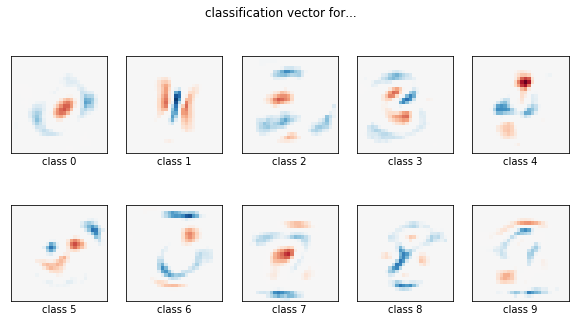

In [21]:
coef=clf.coef_.copy()
plt.figure(figsize=(10,5))
scale=np.abs(coef).max()
for i in range(10):
    l1_plot=plt.subplot(2,5,i+1)
    l1_plot.imshow(coef[i].reshape(28,28),interpolation='nearest',cmap=plt.cm.RdBu,vmin=-scale,vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('class %i'%i)
plt.suptitle('classification vector for...')

In [33]:
run_time=time.time()-t0
print('example run in %.2f s'%run_time)
plt.show()

example run in 1749.22 s
